<a href="https://colab.research.google.com/github/TKTRON44/Partials-elei-o/blob/main/partials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://dadosabertos.tse.jus.br/dataset/resultados-2022/resource/47f692af-7309-4a21-b536-0d1386d449b9
!wget -U "Mozilla" -O historico_1t.zip https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/Historico_Totalizacao_Presidente_BR_1T_2022.zip
!unzip -o historico_1t.zip

# https://dadosabertos.tse.jus.br/dataset/resultados-2022/resource/7cd53725-5dc5-4954-aee9-7dbf4097d26c
!wget -U "Mozilla" -O historico_2t.zip https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/Historico_Totalizacao_Presidente_BR_2T_2022.zip
!unzip -o historico_2t.zip

--2022-11-04 13:20:13--  https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/Historico_Totalizacao_Presidente_BR_1T_2022.zip
Resolving cdn.tse.jus.br (cdn.tse.jus.br)... 99.84.160.31, 99.84.160.60, 99.84.160.88, ...
Connecting to cdn.tse.jus.br (cdn.tse.jus.br)|99.84.160.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625754 (1.5M) [application/zip]
Saving to: ‘historico_1t.zip’

historico_1t.zip    100%[===================>]   1.55M   576KB/s    in 2.8s    

2022-11-04 13:20:17 (576 KB/s) - ‘historico_1t.zip’ saved [1625754/1625754]

Archive:  historico_1t.zip
  inflating: Historico_Totalizacao_Presidente_BR_1T_2022.csv  
  inflating: leiame.pdf              
--2022-11-04 13:20:18--  https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/Historico_Totalizacao_Presidente_BR_2T_2022.zip
Resolving cdn.tse.jus.br (cdn.tse.jus.br)... 99.84.160.31, 99.84.160.60, 99.84.160.88, ...
Connecting to cdn.tse.jus.br (cdn.tse.jus.br)|99.84.160.31|:443..

In [2]:
!pip install datashader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 1.7 MB/s 
     |████████████████████████████████| 76 kB 2.2 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=e75312d9d40d84ec4cd878f4345fbd802ba3a08f2c0aeda29ecd543e055ef2a5
  Stored in directory: /root/.cache/pip/wheels/b5/b7/80/333a5c3312ed4cd54f5d5b869868c14e0c6002cb5c7238b52d
Successfully built datashape


In [3]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datashader as ds
import datashader.transfer_functions as tf

pd.options.plotting.backend = "plotly"

In [4]:
def convert_percent(x):
    return float(x.replace(",", "."))

def read_db_1t(path):
    return pd.read_csv(path, 
        engine="python", sep="\s*;\s*", encoding="latin_1", skipinitialspace=True, parse_dates=["DT_TOTALIZACAO"], dayfirst=True,
        converters={
            "PE_SECOES_TOT_ACUMULADO": convert_percent,
            "CIRO_GOMES_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "LULA_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "PADRE_KELMON_QT_VOTOS_TOT_ACUMULADO": convert_percent,
            "SIMONE_TEBET_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "VERA_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "SOFIA_MANZANO_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "CONSTITUINTE_EYMAEL_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "FELIPE_DAVILA_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "SORAYA_THRONICKE_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "LEO_PERICLES_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "BRANCO_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "NULO_PE_VOTOS_TOT_ACUMULADO":  convert_percent
        },
        index_col=["DT_TOTALIZACAO"]
    )

def read_db_2t(path):
    return pd.read_csv(path, 
        engine="python", sep="\s*;\s*", encoding="latin_1", skipinitialspace=True, parse_dates=["DT_TOTALIZACAO"], dayfirst=True,
        converters={
            "PE_SECOES_TOT_ACUMULADO": convert_percent,
            "LULA_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "BRANCO_PE_VOTOS_TOT_ACUMULADO": convert_percent,
            "NULO_PE_VOTOS_TOT_ACUMULADO":  convert_percent
        },
        index_col=["DT_TOTALIZACAO"]
    ).drop(columns=["CD_PLEITO", "CD_ELEICAO", "CD_CARGO", "SG_UE_UF"])

df_db_1 = read_db_1t("Historico_Totalizacao_Presidente_BR_1T_2022.csv")
df_db_1.to_csv("historico_limpo_1t.csv")

df_db_2 = read_db_2t("Historico_Totalizacao_Presidente_BR_2T_2022.csv")
df_db_2.to_csv("historico_limpo_2t.csv")

df_db = df_db_2

In [5]:
df = df_db[["LULA_QT_VOTOS_TOT", "JAIR_BOLSONARO_QT_VOTOS_TOT"]].copy()
df["DIF_LULA"] = df["LULA_QT_VOTOS_TOT"] - df["JAIR_BOLSONARO_QT_VOTOS_TOT"]
df["LULA"] = df["DIF_LULA"] >= 0
df["ACC_DIF_LULA"] = df["DIF_LULA"].cumsum()
df

,LULA_QT_VOTOS_TOT,JAIR_BOLSONARO_QT_VOTOS_TOT,DIF_LULA,LULA,ACC_DIF_LULA
DT_TOTALIZACAO,,,,,
2022-10-30 17:00:51,10291,10050,241,True,241
2022-10-30 17:00:52,3277,2932,345,True,586
2022-10-30 17:00:54,63700,53619,10081,True,10667
2022-10-30 17:00:55,24111,8960,15151,True,25818
2022-10-30 17:01:51,35,16,19,True,25837
...,...,...,...,...,...
2022-10-30 22:52:55,68,100,-32,False,2139446
2022-10-30 22:53:57,97,79,18,True,2139464
2022-10-30 22:55:00,151,129,22,True,2139486


In [6]:
#from pandas.tseries.frequencies import to_offset

df_ohlc = df["ACC_DIF_LULA"].resample('5T').ohlc().dropna().astype(int)
#df_ohlc.index = df_ohlc.index + to_offset("150s")

df_rs = df["ACC_DIF_LULA"].resample('1s').mean().to_frame("ACC_DIF_LULA")

In [7]:
df_cands_tot = df[["LULA_QT_VOTOS_TOT", "JAIR_BOLSONARO_QT_VOTOS_TOT"]].resample('1T').sum()

In [8]:
trace_candles = go.Candlestick(
    name="Diferença Lula",
    x=df_ohlc.index, 
    open=df_ohlc["open"], 
    close=df_ohlc["close"], 
    high=df_ohlc["high"], 
    low=df_ohlc["low"],
    increasing_line_color="red",
    decreasing_line_color="blue",
)

trace_stack_lula = go.Bar(name="Votos Lula", 
                          x=df_cands_tot.index, 
                          y=df_cands_tot["LULA_QT_VOTOS_TOT"], 
                          opacity=0.2, marker_color="red")

trace_stack_bolso = go.Bar(name="Votos Bolsonaro", 
                           x=df_cands_tot.index, 
                           y=df_cands_tot["JAIR_BOLSONARO_QT_VOTOS_TOT"], 
                           opacity=0.2, marker_color="blue")

trace_raw = go.Scattergl(name = "Bruto",
                       x = df_rs.index, y = df_rs["ACC_DIF_LULA"], 
                       mode = "lines", marker_size=3, marker_color="gray", 
                       opacity=0.2, hoverinfo="none", connectgaps=True)


# trace_stack_lula = go.Scatter(name="Votos Lula", 
#                           mode='lines', stackgroup='one',
#                           x=df_cands_tot.index, 
#                           y=df_cands_tot["LULA_QT_VOTOS_TOT"], 
#                           marker_color='rgba(255,0,0,0.1)',
#                           fillcolor='rgba(255,0,0,0.1)')

# trace_stack_bolso = go.Scatter(name="Votos Bolsonaro", 
#                            mode='lines', stackgroup='one',
#                            x=df_cands_tot.index, 
#                            y=df_cands_tot["JAIR_BOLSONARO_QT_VOTOS_TOT"], 
#                            marker_color='rgba(0,0,255,0.1)',
#                            fillcolor='rgba(0,0,255,0.1)')

fig = make_subplots(specs=[[{"secondary_y": True}]], horizontal_spacing = 0.00)
fig.add_trace(trace_stack_bolso, secondary_y=True)
fig.add_trace(trace_stack_lula, secondary_y=True)
fig.add_trace(trace_raw)
fig.add_trace(trace_candles)

fig.update_xaxes(title_text="Hora", range=["2022-10-30 16:57:00", "2022-10-30 21:15:00"])
fig.update_yaxes(title_text="Diferença")
fig.update_yaxes(title_text="Votos", secondary_y=True)

fig.update_layout(xaxis_rangeslider_visible=False, barmode='stack', yaxis2_showgrid=False)
fig.update_layout(legend=dict(yanchor="top", y=0.99,xanchor="left",x=0.01))

fig.update_layout(margin=dict(l=10, r=10, t=80, b=10))
fig.update_layout(title="Parciais votação 2o turno", title_x=0.0, title_yanchor="top", title_y=0.97, title_xref="paper")
fig.add_annotation(text="Fonte: https://dadosabertos.tse.jus.br/",
                 xref="x domain", yref="y domain",
                 x=0.0, y=1.0, showarrow=False, yanchor="bottom", xanchor="left")

#fig.update_layout(width = 1500, height = 900)
fig.show()

fig.write_html(f"parciais_2turno.html", include_plotlyjs="cdn", default_width="100%", default_height="100%", config={'scrollZoom': True})


In [9]:
fig = px.scatter(df, y="DIF_LULA", color="LULA", 
                 color_discrete_sequence=["red", "blue"],
                 #trendline="rolling", trendline_options=dict(window=50),
                 )
fig.update_traces(marker={'size': 3})

# tr_line=[]
# for  k, trace  in enumerate(fig.data):
#     if trace.mode is not None and trace.mode == 'lines':
#         tr_line.append(k)

# for id in tr_line:
#     fig.data[id].update(line_width=4)

fig.update_xaxes(title_text="Hora", range=["2022-10-30 16:57:00", "2022-10-30 21:15:00"])
fig.update_yaxes(title_text="Diferença")
fig.update_layout(showlegend=False)

fig.update_layout(margin=dict(l=10, r=10, t=80, b=10))
fig.update_layout(title="Parciais votação 2o turno", title_x=0.0, title_yanchor="top", title_y=0.97, title_xref="paper")
fig.add_annotation(text="Fonte: https://dadosabertos.tse.jus.br/",
                 xref="x domain", yref="y domain",
                 x=0.0, y=1.0, showarrow=False, yanchor="bottom", xanchor="left")

#fig.update_layout(width = 1500, height = 900)
fig.show()
fig.write_html(f"parciais_2turno_scatter.html", include_plotlyjs="cdn", default_width="100%", default_height="100%", config={'scrollZoom': True})

WIP

In [10]:
df2 = df_db[["LULA_QT_VOTOS_TOT", "JAIR_BOLSONARO_QT_VOTOS_TOT", "QT_VOTOS_CONCORRENTES"]].resample("1T").sum()#.loc[~(df2==0).all(axis=1)]
#df2[["LULA_QT_VOTOS_TOT", "JAIR_BOLSONARO_QT_VOTOS_TOT"]].plot(color_discrete_sequence=["red", "blue"])

In [11]:
import random

def recompute_inplace(df):
    df["LULA_QT_VOTOS_TOT_ACUMULADO"] = df["LULA_QT_VOTOS_TOT"].cumsum()
    df["JAIR_BOLSONARO_QT_VOTOS_TOT_ACUMULADO"] = df["JAIR_BOLSONARO_QT_VOTOS_TOT"].cumsum()

    df["QT_VOTOS_CONCORRENTES_ACUMULADO"] = df["QT_VOTOS_CONCORRENTES"].cumsum()

    df["LULA_PE_VOTOS_TOT_ACUMULADO"] = df["LULA_QT_VOTOS_TOT_ACUMULADO"] / df["QT_VOTOS_CONCORRENTES_ACUMULADO"]
    df["JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO"] = df["JAIR_BOLSONARO_QT_VOTOS_TOT_ACUMULADO"] / df["QT_VOTOS_CONCORRENTES_ACUMULADO"]

    df["LULA_PE_VOTOS_TOT"] = df["LULA_QT_VOTOS_TOT"] / df["QT_VOTOS_CONCORRENTES"]
    df["JAIR_BOLSONARO_PE_VOTOS_TOT"] = df["JAIR_BOLSONARO_QT_VOTOS_TOT"] / df["QT_VOTOS_CONCORRENTES"]

    return df

def shuffle(df, random_state = None):
    return df.sample(frac=1, random_state=random_state).set_index(df.index)

def shuffle_iter_inplace(df, n = 1):
    for i in range(0, n):
        idx1 = random.randint(0, len(df) - 1)
        idx2 = random.randint(0, len(df) - 1)
        b, c = df.iloc[idx1].copy(), df.iloc[idx2].copy()
        df.iloc[idx1], df.iloc[idx2] = c, b

In [12]:
df2_s = df2.copy()
#df2_s = shuffle(df2_s, 70) # 17, 35
recompute_inplace(df2_s)
#df2_s = df2_s.sort_values(by="LULA_PE_VOTOS_TOT", ascending=True, ignore_index=True).set_index(df2.index)
#df2_s = df2_s[::-1].set_index(df2.index)
fig = px.line(df2_s[["LULA_PE_VOTOS_TOT_ACUMULADO", "JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO"]], color_discrete_sequence=["red", "blue"])
#fig = px.line(df2_s[["LULA_PE_VOTOS_TOT", "JAIR_BOLSONARO_PE_VOTOS_TOT"]], color_discrete_sequence=["red", "blue"])
#fig = px.line(df2_s[["LULA_QT_VOTOS_TOT_ACUMULADO", "JAIR_BOLSONARO_QT_VOTOS_TOT_ACUMULADO"]], color_discrete_sequence=["red", "blue"])
fig.update_xaxes(title_text="Hora")#, range=["2022-10-30 16:57:00", "2022-10-30 21:15:00"])
fig.update_yaxes(title_text="Percentual", range=[0.4, 0.6])
#fig.update_yaxes(title_text="Total votos")
fig.update_layout(margin=dict(l=10, r=10, t=80, b=10))
fig.update_layout(width = 1500, height = 900)
#fig.update_layout(showlegend=False)
fig.update_traces(connectgaps=True)
#fig.update_layout(title="Simulação ordem ALEATÓRIA votação 2o turno presidente", title_x=0.0, title_yanchor="top", title_y=0.97, title_xref="paper")
fig.update_layout(title="Parciais votação 2o turno presidente", title_x=0.0, title_yanchor="top", title_y=0.97, title_xref="paper")
fig.add_annotation(text="Fonte: https://dadosabertos.tse.jus.br/",
                 xref="x domain", yref="y domain",
                 x=0.0, y=1.0, showarrow=False, yanchor="bottom", xanchor="left")
fig.update_layout(legend=dict(yanchor="top", y=0.99,xanchor="left",x=0.75))
#fig.update_layout(legend=dict(yanchor="top", y=0.99,xanchor="left",x=0.05))
fig.show()

In [13]:
df2_s = df2.copy()

n = 10000
points = len(df2_s.index)
time = np.linspace(0, 1, points)

dfs_lula = []
dfs_bolso = []
for i in range(n):
    recompute_inplace(df2_s)
    
    s = df2_s["LULA_PE_VOTOS_TOT_ACUMULADO"].copy()
    s.name = i
    dfs_lula.append(s)

    s = df2_s["JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO"].copy()
    s.name = i
    dfs_bolso.append(s)

    df2_s = shuffle(df2)
    # if i < 5:
    #     pass
    # elif i < 100:
    #     shuffle_iter_inplace(df2_s, int((i/100) * 10))
    # else:
    #     shuffle_iter_inplace(df2_s, 10)

df_all_lula = pd.concat(dfs_lula, axis = 1).reset_index(drop=True)
df_all_bolso = pd.concat(dfs_bolso, axis = 1).reset_index(drop=True)


In [14]:
cvs = ds.Canvas(plot_height=900, plot_width=1500, x_range=[0, 1.0], y_range=[0.4, 0.6])

agg_lula = cvs.line(df_all_lula.T, x=time, y=list(range(points)), agg=ds.count(), axis=1, line_width=0, antialias=True)
img_lula = tf.shade(agg_lula, how='eq_hist', cmap="red")

agg_bolso = cvs.line(df_all_bolso.T, x=time, y=list(range(points)), agg=ds.count(), axis=1, line_width=0, antialias=True)
img_bolso = tf.shade(agg_bolso, how='eq_hist', cmap="blue")


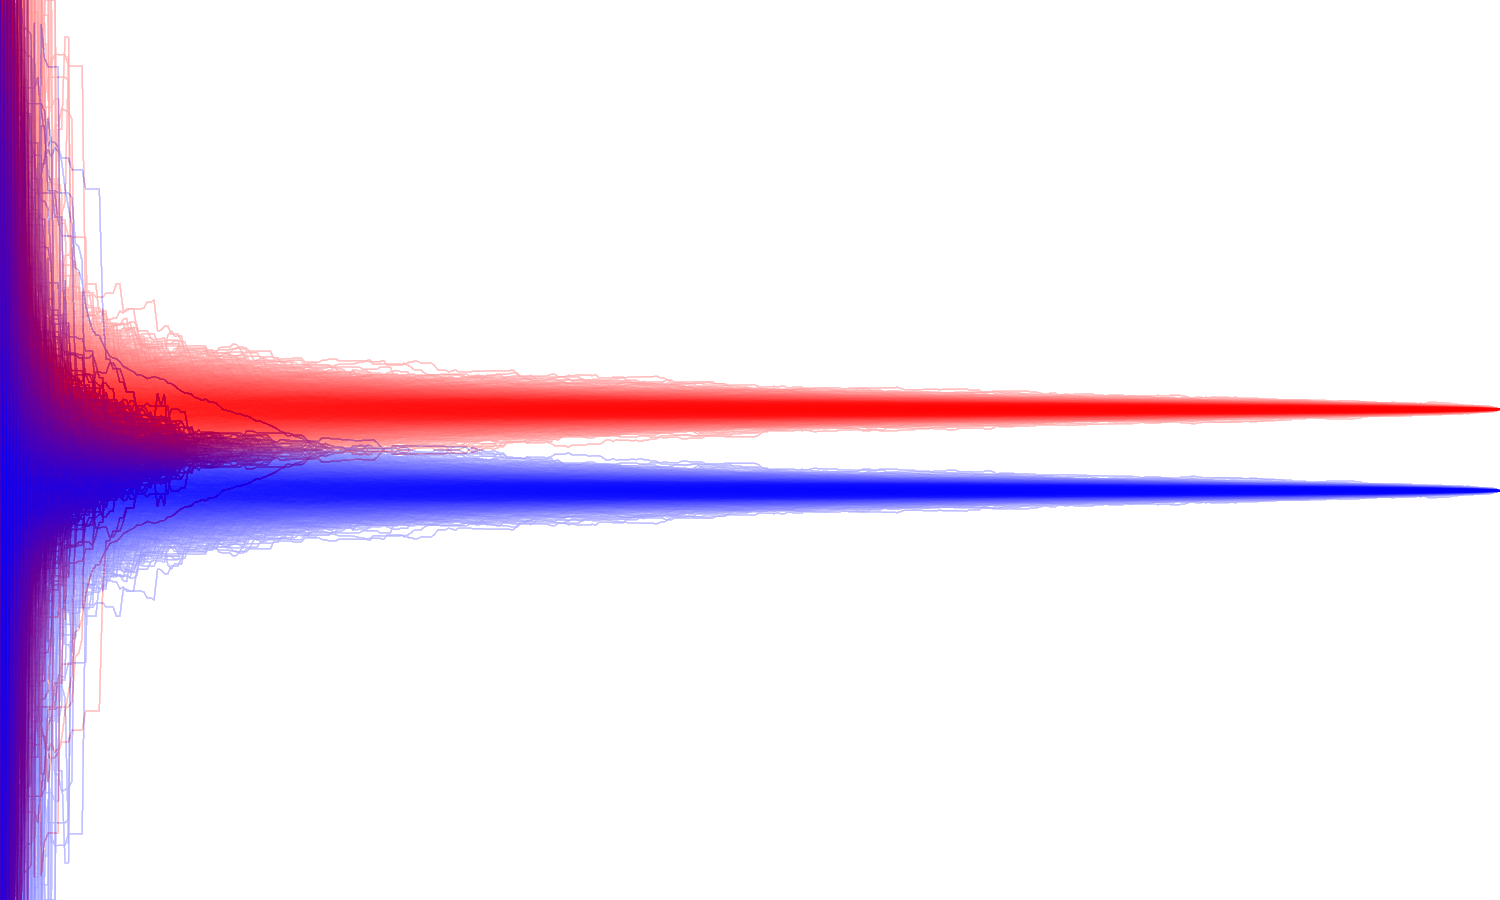

In [15]:
#img_lula
#img_bolso
tf.stack(img_bolso, img_lula, how="saturate")

Turnos

In [16]:
db_db_1_pct = df_db_1.reset_index().set_index("PE_SECOES_TOT_ACUMULADO")[["LULA_PE_VOTOS_TOT_ACUMULADO", "JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO", "DT_TOTALIZACAO"]]
db_db_1_pct[["LULA_PE_VOTOS_TOT_ACUMULADO", "JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO"]].plot(color_discrete_sequence=["red", "blue"])

In [17]:
df_slice = db_db_1_pct.iloc[100:]
df_slice[df_slice["LULA_PE_VOTOS_TOT_ACUMULADO"] > df_slice["JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO"]].head()

,LULA_PE_VOTOS_TOT_ACUMULADO,JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO,DT_TOTALIZACAO
PE_SECOES_TOT_ACUMULADO,,,
0.679587,0.456254,0.456194,2022-10-02 19:59:54
0.679593,0.456257,0.456192,2022-10-02 19:59:55
0.679727,0.456305,0.456151,2022-10-02 19:59:56
0.679856,0.456313,0.456142,2022-10-02 19:59:57
0.680057,0.456321,0.456139,2022-10-02 19:59:58


In [18]:
db_db_2_pct = df_db_2.reset_index().set_index("PE_SECOES_TOT_ACUMULADO")[["LULA_PE_VOTOS_TOT_ACUMULADO", "JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO", "DT_TOTALIZACAO"]]
db_db_2_pct[["LULA_PE_VOTOS_TOT_ACUMULADO", "JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO"]].plot(color_discrete_sequence=["red", "blue"])

In [19]:
df_slice = db_db_2_pct.iloc[100:]
df_slice[df_slice["LULA_PE_VOTOS_TOT_ACUMULADO"] > df_slice["JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO"]].head()

,LULA_PE_VOTOS_TOT_ACUMULADO,JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO,DT_TOTALIZACAO
PE_SECOES_TOT_ACUMULADO,,,
0.667843,0.500071,0.499929,2022-10-30 18:42:53
0.667871,0.500081,0.499919,2022-10-30 18:42:54
0.668049,0.500079,0.499921,2022-10-30 18:42:55
0.668085,0.500076,0.499924,2022-10-30 18:42:56
0.668296,0.500018,0.499982,2022-10-30 18:42:57
